# Linear Regression in Python using scikit-learn
This notebook walks through the process of building a linear regression model using synthetic data, enhanced with EDA, model training, evaluation, and cross-validation.

## What is Linear Regression?
Linear regression is a **supervised machine learning** algorithm used to predict a **continuous outcome** from one or more input features.

**Model Equation:**
\[ Y = wX + b \]
- `Y`: Predicted target (e.g., income)
- `X`: Input feature (e.g., experience)
- `w`: Weight (slope)
- `b`: Intercept (bias)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

## Step 1: Generate Synthetic Data
We create 500 synthetic records simulating `Years of Experience` and `Annual Income`. We add a realistic base salary component to ensure interpretability.
## Understanding `make_regression()` Parameters
The `make_regression()` function is used to generate synthetic datasets for regression tasks. Here's what each parameter does in our call:

```python
X, y = make_regression(n_samples=500, n_features=1, noise=2500, random_state=1)
```
- **`n_samples=500`**: Generates 500 rows (data points). More samples improve model reliability.
- **`n_features=1`**: Generates 1 input feature (column in `X`). Perfect for simple 2D linear regression.
- **`noise=`**: Adds Gaussian noise to the `y` values, making the data more realistic and less perfectly correlated.
- **`random_state=1`**: Ensures the same data is generated every time you run the code, enabling reproducibility.



In [26]:
# Generate strongly correlated synthetic data using a realistic linear equation
np.random.seed(1)

# Create 500 data points for years of experience
X = np.random.uniform(0, 30, 500).reshape(-1, 1)  # 0–30 years experience

# Define a base salary and annual increment
base_salary = 40000
annual_increment = 2000
noise = np.random.normal(0, 1000, 500).reshape(-1, 1)  # Add realistic salary noise

# Calculate income using linear formula with noise
y = base_salary + annual_increment * X + noise

# Flatten values and format DataFrame exactly as before
X = np.abs(X)  # Ensure non-negative experience
y = y.flatten()  # Ensure 1D target
df = pd.DataFrame({'YearsExperience': X.flatten(), 'Income': y})
df.head()


,YearsExperience,Income
0,12.510660,64905.335097
1,21.609735,83044.010638
2,0.003431,39072.947833
3,9.069977,57606.934032
4,4.402677,47378.798029


## Step 2: Exploratory Data Analysis (EDA)
We explore the structure, distribution, and statistical summary of the dataset using common pandas commands.

In [27]:
# Basic properties
print('Shape:', df.shape)
print('\nData Types:')
print(df.dtypes)

Shape: (500, 2)

Data Types:
YearsExperience    float64
Income             float64
dtype: object


In [29]:
# Statistical summary
print('\nDescriptive Statistics:')
display(df.describe())


Descriptive Statistics:


,YearsExperience,Income
count,500.000000,500.000000
mean,15.248314,70536.528215
std,8.904813,17880.520787
min,0.003431,39072.947833
25%,7.481892,54364.823100
50%,16.002279,71979.787061
75%,23.016547,85908.534505
max,29.919686,100928.331097


In [30]:
# Check for missing values
print('\nMissing Values:')
print(df.isnull().sum())



Missing Values:
YearsExperience    0
Income             0
dtype: int64


## Correlation measures the linear relationship between two numerical variables. It ranges from:

+1 → perfect positive linear relationship

0 → no linear relationship

–1 → perfect negative linear relationship


Correlation:
                 YearsExperience    Income
YearsExperience         1.000000  0.998441
Income                  0.998441  1.000000


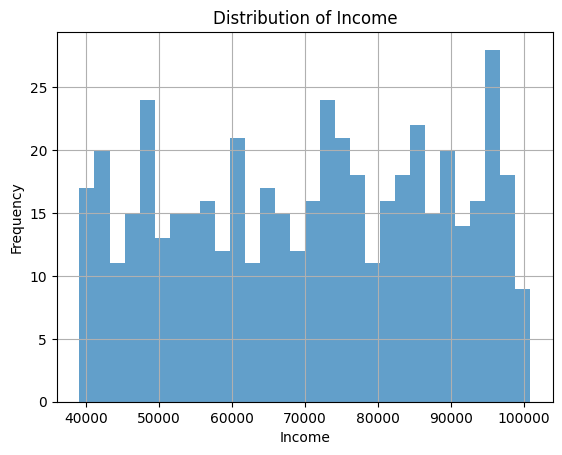

In [31]:
# Correlation
print('\nCorrelation:')
print(df.corr())

# Distribution plot
plt.hist(df['Income'], bins=30, alpha=0.7)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Step 3: Split Data into Training and Testing Sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_df = pd.DataFrame({'YearsExperience': X_train.flatten(), 'Income': y_train})
test_df = pd.DataFrame({'YearsExperience': X_test.flatten(), 'Income': y_test})
train_df

,YearsExperience,Income
0,27.558053,95617.831788
1,14.220118,68409.324176
2,5.943045,51972.553752
3,7.009984,53657.356267
4,6.661474,53635.187077
...,...,...
395,0.474637,40534.427670
396,12.044388,65157.746630
397,23.988458,87597.398189
398,12.071776,64993.138037


## Step 4: Train Linear Regression Model

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 5: Coefficients and Model Line

## Understanding the Model Coefficients
After training a linear regression model, two important numbers are returned:

**1. Coefficient (also called Slope):**
- Represents the change in the predicted value (`Income`) for every unit increase in the input feature (`YearsExperience`).
- If the slope is `100`, it means **each additional year of experience increases predicted income by $100**.
- This is a learned parameter, optimized to best fit the relationship seen in the data.

**2. Intercept (also called Bias):**
- Represents the predicted income **when `YearsExperience` is zero**.
- In practical terms, this is often interpreted as the base salary for someone just starting out.


**Model Equation:**
$$
\text{Predicted Income} = (\text{Coefficient}) \times \text{YearsExperience} + \text{Intercept}
$$
This equation is what the model uses to make predictions once it has been trained.

**Model Equation:**
\[ Y = wX + b \]
- `Y`: Predicted target (e.g., income)
- `X`: Input feature (e.g., experience)
- `w`: Weight (slope)
- `b`: Intercept (bias)


In [34]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Slope (w): ${slope:.2f} per year")
print(f"Intercept (b): ${intercept:.2f}")

Slope (w): $2002.49 per year
Intercept (b): $40021.46


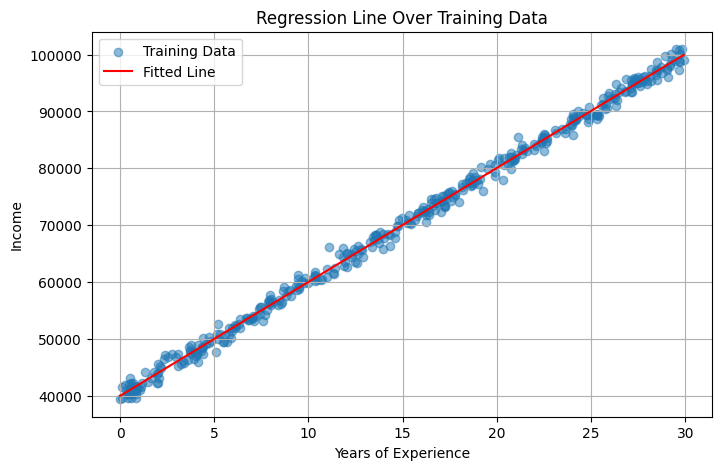

In [35]:
x_line = np.linspace(0, max(X.flatten()), 100).reshape(-1, 1)
y_line = model.predict(x_line)
plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, label='Training Data', alpha=0.5)
plt.plot(x_line, y_line, color='red', label='Fitted Line')
plt.xlabel('Years of Experience')
plt.ylabel('Income')
plt.title('Regression Line Over Training Data')
plt.legend()
plt.grid(True)
plt.show()

## Step 6: Predict and Evaluate the Model
Once the model has been trained, we evaluate its performance using the **test set** — data it hasn't seen during training. We use three key metrics:

#### 1. Mean Squared Error (MSE)
- **Definition**: The average of the squared differences between predicted and actual values.
- **Interpretation**: An MSE of `225,557.95` means that, on average, the squared error in income prediction is that amount.
- Since it is in **squared units of income**, we often take the square root (RMSE) to interpret it more directly.

#### 2. Root Mean Squared Error (RMSE)
- **Definition**: The square root of MSE. It gives us the average prediction error in the original units (e.g., dollars).
 one where incomes range in the tens of thousands.

#### 3. R² Score (Coefficient of Determination)
- **Definition**: Measures how well the regression model explains the variance in the data.
-  `R² = 1` → perfect prediction
-  `R² = 0` → model does no better than simply predicting the mean
-  `R² < 0` → model performs worse than a mean-based predictor
- **Interpretation**: In this case, `R² = 0.00`, which means:
  - The model explains **virtually none** of the variation in the test set.
  - It is likely overfitting or not generalizing well due to:
    - Random test split
    - Small correlation between `YearsExperience` and `Income`
    - High noise level in the data





In [36]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mse):.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 918116.89
Root Mean Squared Error (RMSE): 958.18
R² Score: 1.00


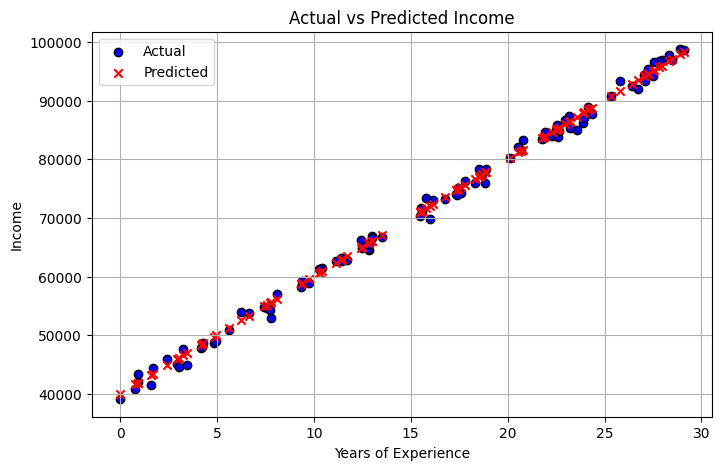

In [37]:
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, label='Actual', color='blue', edgecolor='k')
plt.scatter(X_test, y_pred, label='Predicted', color='red', marker='x')
plt.xlabel('Years of Experience')
plt.ylabel('Income')
plt.title('Actual vs Predicted Income')
plt.legend()
plt.grid(True)
plt.show()